# News Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Turing AI/news.csv")
df.sample(2)

,Unnamed: 0,title,text,label
5416,4345,Is Hillary Running for Bill’s Third Term?,When Hillary Clinton announces her candidacy o...,REAL
352,4930,Trump and advisers remain split on how far to ...,Ten days after he appointed new campaign leade...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


## Removing 'Unnamed: 0' column

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

## Changing datatypes

In [ ]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [ ]:
df['label']=df['label'].astype('category')

##Checking for Null values

In [ ]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

## Checking for duplicate values

In [ ]:
df.duplicated().sum()

29

## Removing duplicates value

In [ ]:
df.drop_duplicates(inplace=True)

## Encoding Label column
0-Fake
1-Real

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df['label'].head(5)

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [ ]:
le.classes_

array(['FAKE', 'REAL'], dtype=object)

In [ ]:
list(le.inverse_transform([0,1]))

['FAKE', 'REAL']

## Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [ ]:
!pip install nltk

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
df['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [ ]:
transform_text(df['text'][0])

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack women jame ca

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

## Splitting into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['transformed_text'],df['label'],test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5044,), (1262,), (5044,), (1262,))

## Converting words to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [ ]:
len(tfidf_train.toarray()[0])

39087

## Trying different models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
pac = PassiveAggressiveClassifier()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'PAC':pac,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(tfidf_train,y_train)
    y_pred = clf.predict(tfidf_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, tfidf_train,y_train,tfidf_test,y_test)
    current_accuracy=round(current_accuracy,4)*100
    current_precision=round(current_precision,4)*100
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  92.86999999999999
Precision -  93.96
For  PAC
Accuracy -  93.03
Precision -  93.05
For  KN
Accuracy -  59.35
Precision -  98.66
For  NB
Accuracy -  87.24
Precision -  82.06
For  DT
Accuracy -  81.14
Precision -  85.71
For  LR
Accuracy -  89.94
Precision -  92.21000000000001
For  RF
Accuracy -  91.2
Precision -  92.53
For  AdaBoost
Accuracy -  87.08
Precision -  88.85
For  BgC
Accuracy -  88.27000000000001
Precision -  89.23
For  ETC
Accuracy -  90.81
Precision -  91.44
For  GBDT
Accuracy -  87.4
Precision -  90.44
For  xgb
Accuracy -  91.05
Precision -  92.91


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,KN,59.35,98.66
0,SVC,92.87,93.96
1,PAC,93.03,93.05
11,xgb,91.05,92.91
6,RF,91.20,92.53
5,LR,89.94,92.21
9,ETC,90.81,91.44
10,GBDT,87.40,90.44
8,BgC,88.27,89.23
7,AdaBoost,87.08,88.85


##Stacking classifier

In [ ]:
estimators=[('svm', svc), ('PAC',pac), ('RF', rfc)]
final_estimator=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(tfidf_train,y_train)
y_pred = clf.predict(tfidf_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9358161648177497
Precision 0.939117199391172


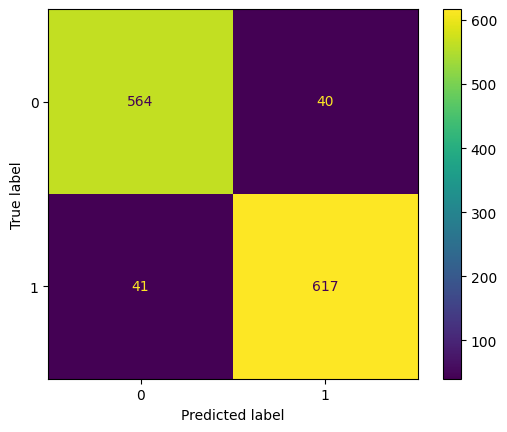

In [ ]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pac.classes_)
disp.plot()
plt.show()

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
input_sms=input("Enter the news: ")
transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])
result = clf.predict(vector_input)[0]
if result == 1:
  print("Real News")
else:
  print("Fake News")

Enter the news: "Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.  In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI.  The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI.  But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election.  The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI.  The FBI’s leadership is being warned tha